🐍  Bangladeshi Snake Recognizer  

| No. | English Name            | বাংলা নাম          | Type            |
|-----|-------------------------|-------------------|-----------------|
| 1   | Spectacled Cobra        | গোখরা             | Venomous        |
| 2   | Monocled Cobra          | চশমা গোখরা        | Venomous        |
| 3   | King Cobra              | রাজ গোখরা         | Venomous        |
| 4   | Common Krait            | কালাই সাপ         | Venomous        |
| 5   | Banded Krait            | ব্যান্ডেড ক্রাইট  | Venomous        |
| 6   | Russell's Viper         | চন্দ্রবোড়া        | Venomous        |
| 7   | Saw-scaled Viper        | একিস ভাইপার      | Venomous        |
| 8   | Green Pit Viper         | সবুজ পিট ভাইপার   | Venomous        |
| 9   | Beaked Sea Snake        | সমুদ্র সাপ        | Venomous        |
| 10  | Yellow-lipped Sea Krait | সমুদ্র ক্রাইট     | Venomous        |
| 11  | Indian Rock Python      | আজগর              | Non-Venomous    |
| 12  | Rat Snake               | দাড়াশ             | Non-Venomous    |
| 13  | Checkered Keelback      | ধামন              | Non-Venomous    |
| 14  | Common Wolf Snake       | নেকড়ে সাপ         | Non-Venomous    |
| 15  | Green Trinket Snake     | সবুজ সাপ          | Non-Venomous    |
| 16  | Bronzeback Tree Snake   | গাছে ওঠা সাপ     | Non-Venomous    |
| 17  | Common Kukri Snake      | কুক্রি সাপ        | Non-Venomous    |


# Setting Up Necessary Things

---



---



In [ ]:
%matplotlib inline

In [ ]:
!pip install -Uqq fastai fastbook nbdev

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.0 MB/s eta 0:00:00


In [ ]:
!pip install bing-image-downloader

In [ ]:
!pip install icrawler

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Bangladeshi_snake_recognizer

/content/drive/My Drive/Bangladeshi_snake_recognizer


# Download Images from Browser

In [ ]:

from icrawler.builtin import BingImageCrawler
from icrawler import ImageDownloader
import os

# Custom downloader class
class MyDownloader(ImageDownloader):
    def __init__(self, *args, timeout=30, extensions=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.timeout = timeout
        self.extensions = extensions

# Main folder
root_dir = "data"
os.makedirs(root_dir, exist_ok=True)


snakes_bd = [
    {"english": "Spectacled Cobra", "bangla": "গোখরা"},
    {"english": "Monocled Cobra", "bangla": "চশমা গোখরা"},
    {"english": "King Cobra", "bangla": "রাজ গোখরা"},
    {"english": "Common Krait", "bangla": "কালাই সাপ"},
    {"english": "Banded Krait", "bangla": "ব্যান্ডেড ক্রাইট"},
    {"english": "Russell's Viper", "bangla": "চন্দ্রবোড়া"},
    {"english": "Saw-scaled Viper", "bangla": "একিস ভাইপার"},
    {"english": "Green Pit Viper", "bangla": "সবুজ পিট ভাইপার"},
    {"english": "Beaked Sea Snake", "bangla": "সমুদ্র সাপ"},
    {"english": "Yellow-lipped Sea Krait", "bangla": "সমুদ্র ক্রাইট"},
    {"english": "Indian Rock Python", "bangla": "আজগর"},
    {"english": "Rat Snake", "bangla": "দাড়াশ"},
    {"english": "Checkered Keelback", "bangla": "ধামন"},
    {"english": "Common Wolf Snake", "bangla": "নেকড়ে সাপ"},
    {"english": "Green Trinket Snake", "bangla": "সবুজ সাপ"},
    {"english": "Bronzeback Tree Snake", "bangla": "গাছে ওঠা সাপ"},
    {"english": "Common Kukri Snake", "bangla": "কুক্রি সাপ"}
]



snake_dict = {s["english"]: s["bangla"] for s in snakes_bd}

for s in snakes_bd:
    snake_name = s["english"]
    save_dir = os.path.join(root_dir, snake_name.replace(" ", "_"))
    os.makedirs(save_dir, exist_ok=True)

    print(f"Downloading images for: {snake_name} – {s['bangla']}")

    crawler = BingImageCrawler(
        storage={"root_dir": save_dir},
        parser_threads=2,
        downloader_threads=4,
        downloader_cls=MyDownloader  # Use custom downloader
    )

    # Set extensions in the downloader object directly
    crawler.downloader.extensions = ['.jpg', '.jpeg', '.png']

    crawler.crawl(keyword=snake_name, max_num=500)

print("All images saved inside 'data/' folder")


ERROR:downloader:Response status code 404, file https://ecofriendlycoffee.org/wp-content/uploads/2012/04/cobra-39.jpg
ERROR:downloader:Response status code 401, file https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/f/696df829-0bb7-4999-b6e0-2a6796b4bfde/dfle2z4-5567d633-51fd-4991-9afd-aa4cdb877695.jpg
ERROR:downloader:Response status code 404, file https://ecofriendlycoffee.org/wp-content/uploads/2012/04/cobra-20-300x200.jpg
ERROR:downloader:Response status code 404, file https://ecofriendlycoffee.org/wp-content/uploads/2012/04/cobra-16.jpg
ERROR:downloader:Response status code 403, file https://i1.rgstatic.net/ii/profile.image/299354238799878-1448383020549_Q64/Choo-Tan-2.jpg
ERROR:downloader:Response status code 403, file https://c.ndtvimg.com/2025-09/08j9c4jo_big-four_625x300_08_September_25.jpg


KeyboardInterrupt: 

In [ ]:
# Main folder where you saved images
root_dir = "data"   # change to "Snake_recognizer/data" if needed

# Count images inside each snake folder
total_images = 0
for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    if os.path.isdir(folder_path):
        image_count = len([
            f for f in os.listdir(folder_path)
            if f.lower().endswith((".jpg", ".jpeg", ".png"))
        ])
        total_images += image_count
        print(f"{folder}: {image_count} images")

print(f"\n Total images downloaded: {total_images}")


Spectacled_Cobra: 297 images
Monocled_Cobra: 244 images
King_Cobra: 253 images
Common_Krait: 232 images
Banded_Krait: 229 images
Russell's_Viper: 298 images
Saw-scaled_Viper: 237 images
Green_Pit_Viper: 253 images
Beaked_Sea_Snake: 179 images
Yellow-lipped_Sea_Krait: 252 images
Indian_Rock_Python: 265 images
Rat_Snake: 207 images
Checkered_Keelback: 250 images
Common_Wolf_Snake: 217 images
Green_Trinket_Snake: 222 images
Bronzeback_Tree_Snake: 282 images
Common_Kukri_Snake: 227 images

 Total images downloaded: 4144


In [ ]:
image_counts = get_image_files(root_dir)
image_counts

(#4144) [Path('data/Spectacled_Cobra/000001.jpg'),Path('data/Spectacled_Cobra/000002.jpg'),Path('data/Spectacled_Cobra/000003.jpg'),Path('data/Spectacled_Cobra/000004.jpg'),Path('data/Spectacled_Cobra/000005.jpg'),Path('data/Spectacled_Cobra/000006.jpg'),Path('data/Spectacled_Cobra/000007.jpg'),Path('data/Spectacled_Cobra/000008.jpg'),Path('data/Spectacled_Cobra/000009.jpg'),Path('data/Spectacled_Cobra/000010.jpg'),Path('data/Spectacled_Cobra/000011.jpg'),Path('data/Spectacled_Cobra/000012.jpg'),Path('data/Spectacled_Cobra/000013.jpg'),Path('data/Spectacled_Cobra/000014.jpg'),Path('data/Spectacled_Cobra/000015.jpg'),Path('data/Spectacled_Cobra/000016.jpg'),Path('data/Spectacled_Cobra/000017.jpg'),Path('data/Spectacled_Cobra/000018.jpg'),Path('data/Spectacled_Cobra/000019.jpg'),Path('data/Spectacled_Cobra/000020.jpg')...]

In [ ]:
# from fastai.vision.all import get_image_files, verify_images

valid_exts = {'.jpg', '.jpeg', '.png'}

# Get all image files under root_dir
all_images = get_image_files(root_dir)

# Keep only correct extensions
images_ok = [f for f in all_images if f.suffix.lower() in valid_exts]

# Verify only those
failed = verify_images(images_ok)

print(f"Total images: {len(all_images)}")
print(f"Valid images: {len(images_ok)}")
print(f"Corrupted images: {len(failed)}")


Total images: 4144
Valid images: 4144
Corrupted images: 0


In [ ]:
failed.map(Path.unlink)

(#0) []

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # Get all images recursively
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # 90% train, 10% validation
    get_y=parent_label,                               # Folder name as label
    item_tfms=Resize(128)                             # Resize images to 128x128
)

In [ ]:
# path to your 'data' folder
path = Path('/content/drive/My Drive/Bangladeshi_snake_recognizer/data')

# create DataLoaders
dls = dblock.dataloaders(path, bs=32)  # bs=32 → batch size

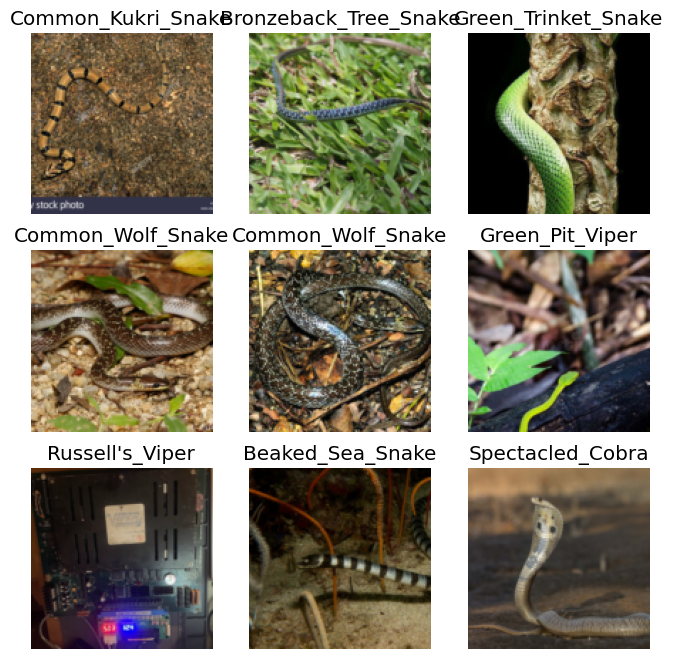

In [ ]:
dls.show_batch(max_n=9, figsize=(8,8))

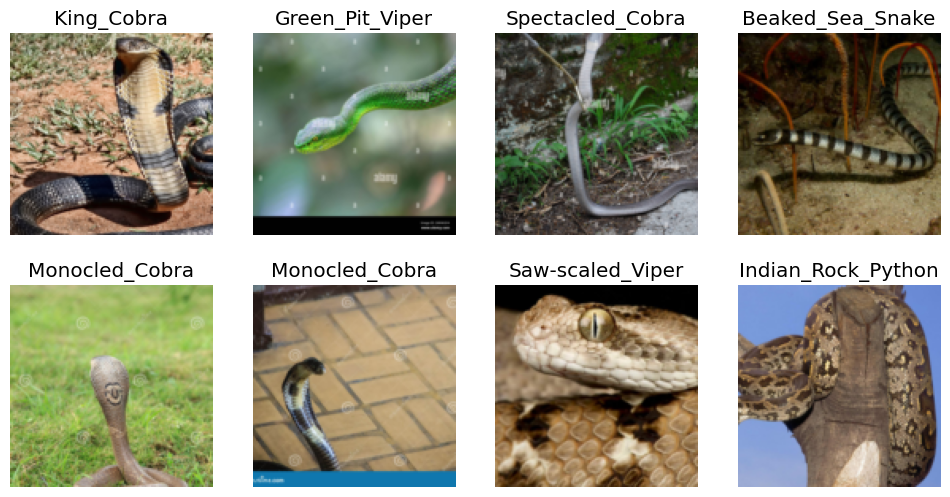

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

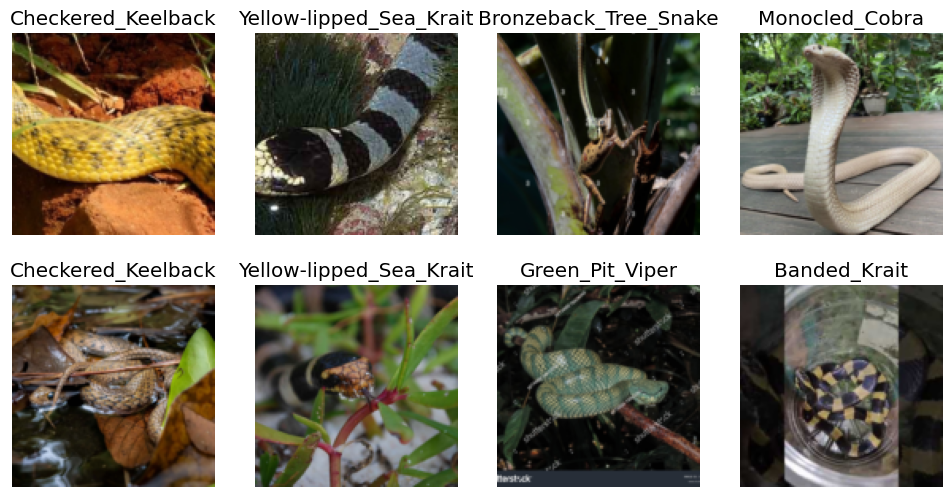

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

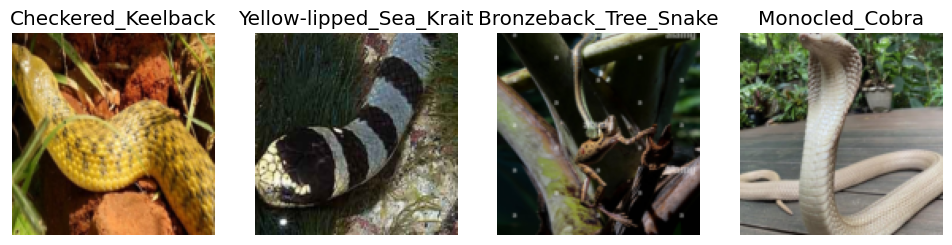

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(root_dir)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
torch.save(dls, "snake_dataloader_v1.pkl")